In [1]:
%matplotlib notebook
from QDP import qdp
import os.path
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt

In [8]:
dp = '/home/ebert/jupyter-notebooks/FNode-data'
exp_name = '2017_12_04_12_56_20_f2-retention-test-high-stat'
exp_date = '_'.join(exp_name.split('_')[:3])
experiment_file = os.path.join(exp_date, exp_name, 'results.hdf5')
q = qdp.QDP(base_data_path=dp)
q.load_data_file(experiment_file)

name 'fort_exp' is not defined


In [9]:
q.experiments[0]['variable_list']

[u'rb_d2_read_mz_det']

### if the fit works

In [4]:
sig = []
for i in q.experiments[0]['iterations']:
    results = q.generate_thresholds(itr=i)[0]
    sig.append(results['fit_params'][3]-results['fit_params'][2])

/home/ebert/jupyter-notebooks/FNode/analyses/qdp/QDP/qdp.py:33: RuntimeWarning: divide by zero encountered in divide
  return A0*np.exp(-(x-m0)**2 / (2*s0**2))/np.sqrt(2*np.pi*s0**2) + A1*np.exp(-(x-m1)**2 / (2*s1**2))/np.sqrt(2*np.pi*s1**2)
/home/ebert/jupyter-notebooks/FNode/analyses/qdp/QDP/qdp.py:33: RuntimeWarning: invalid value encountered in divide
  return A0*np.exp(-(x-m0)**2 / (2*s0**2))/np.sqrt(2*np.pi*s0**2) + A1*np.exp(-(x-m1)**2 / (2*s1**2))/np.sqrt(2*np.pi*s1**2)
/usr/local/lib/python2.7/dist-packages/scipy/optimize/minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/ebert/jupyter-notebooks/FNode/analyses/qdp/QDP/qdp.py:29: RuntimeWarning: invalid value encountered in double_scalars
  return 1/(1+A0*s0*(1+special.erf(m0/np.sqrt(2)/s0))/A1/s1/(1+special.erf(m1/np.sqrt(2)/s1)))


<IPython.core.display.Javascript object>


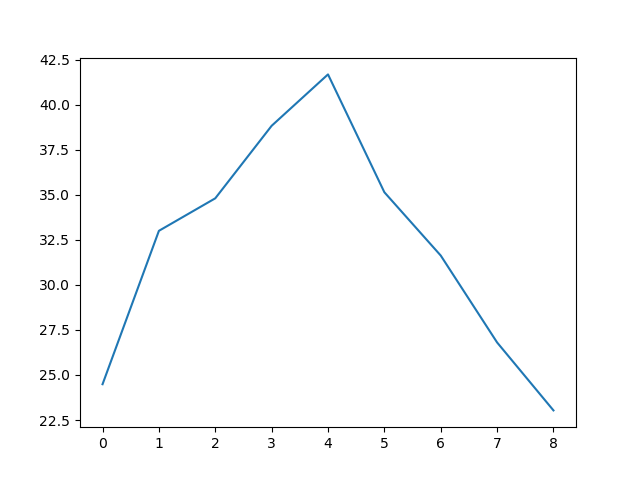

In [6]:
fig, ax = plt.subplots()
ax.plot(np.arange(len(sig)), sig)

In [7]:
sig[4]

41.691767661056019

### if the fit doesnt work

In [17]:
# get s0 cuts
cuts = [[31],[2]]
q.set_thresholds(cuts)
retention = q.apply_thresholds()
itrs = len(q.experiments[0]['iterations'].keys())
s1_cuts = []
for itr in range(itrs):
    s1_cuts.append(q.experiments[0]['iterations'][itr]['signal_data'][q.experiments[0]['iterations'][itr]['quantized_data'][:,0].astype('bool'),1])

<IPython.core.display.Javascript object>


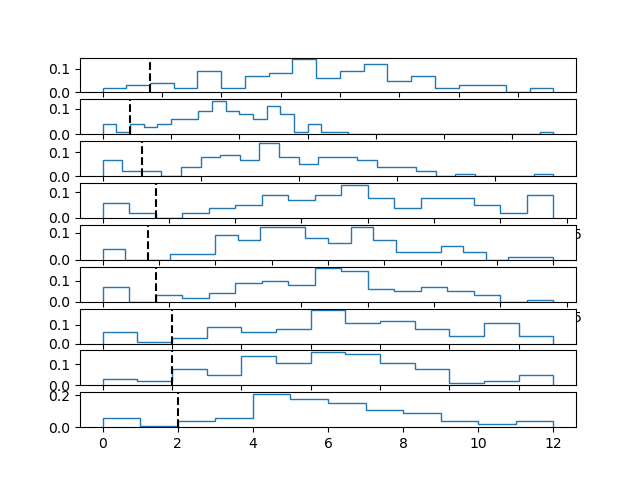

In [20]:
fig, ax = plt.subplots(itrs)
s1_sigs = []
for itr in range(itrs):
    ax[itr].hist(s1_cuts[itr], bins=np.arange(max(s1_cuts[itr])+1), density=True, histtype='step')
    ax[itr].axvline(x=cuts[1][0], color='k', linestyle='--')
    s1_sigs.append(np.mean(s1_cuts[itr]))

fmts = ['pdf', 'png']
fn = os.path.join(dp, os.path.dirname(experiment_file), 's1_readout_det_scan.{}')
for fmt in fmts:
    fig.savefig(fn.format(fmt), dpi=200, format=fmt)


#s1_bg = np.mean(s1_nocut)

In [25]:
s1_sigs[3:5]

[9.0198019801980198, 8.9793814432989691]